In [1]:
import time
import os
import numpy as np
import sys
import pandas as pd
import glob
import matplotlib.pyplot as plt
import cv2
import ast
import stumpy
from stumpy import config
import numpy as np
import numpy.testing as npt
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

auxiliary_codes_path =  ".." + os.sep + "codigo_auxiliares"
sys.path.append(auxiliary_codes_path)
import essencials as es


In [2]:
config.STUMPY_EXCL_ZONE_DENOM = 1/3  # i ± int(np.ceil(m / {1}))
plt.rcParams['font.size'] = 10
plt.rcParams["font.family"] = "Times New Roman"
plt.style.use('https://raw.githubusercontent.com/TDAmeritrade/stumpy/main/docs/stumpy.mplstyle')

In [3]:
baseDir = os.path.join('..', 'Dataset')

# Seach pacth of MEASURE files
MAIN_LIST_MEASURE = []

MEASURE_FILE_PATH = 'VD_WORDS_OCCURRENCE.CSV'

MAIN_LIST_MEASURE_local = []

# B1.2 - Collect in YT
baseDir_yt = os.path.join(baseDir, 'YT-Online')

# Call the basic function
MAIN_LIST_MEASURE_yt = es.list_scan_from_path (baseDir_yt, MEASURE_FILE_PATH)

# Join the Two Lists
MAIN_LIST_MEASURE = MAIN_LIST_MEASURE_local + MAIN_LIST_MEASURE_yt

In [4]:
SUB_FILE_NAME = 'VD_SUBTITLES.CSV'
MAIN_LIST_MEASURE_FILTER = []
for current_path in MAIN_LIST_MEASURE:
    path = es.collect_current_path(current_path)
    check, _ = es.check_file_exist(path, SUB_FILE_NAME)
    if check:
        MAIN_LIST_MEASURE_FILTER.append(current_path)  

## Reading all Word Occurrence files

In [5]:
VD_INFO_DT = 'VD_INFO.CSV'
TOTAL = pd.DataFrame()
for current_path in MAIN_LIST_MEASURE_FILTER:
    path_dir = es.collect_current_path(current_path)
    vd_info_path = os.path.join(path_dir, VD_INFO_DT)
    
    vd_info = pd.read_csv(vd_info_path)
    vd_info.drop(columns=['Unnamed: 0'], inplace=True)
    video_id =  vd_info.video_id[0]
    
    try:
        VD_WORDS_OCCURRENCE = pd.read_csv(current_path)
        if 'Unnamed: 0' in VD_WORDS_OCCURRENCE.columns:
            VD_WORDS_OCCURRENCE.drop(columns=['Unnamed: 0'], inplace=True)
            
        VD_WORDS_OCCURRENCE.insert(0, 'video_id', video_id)
        TOTAL = pd.concat([TOTAL, VD_WORDS_OCCURRENCE])
        if VD_WORDS_OCCURRENCE.empty:
            print("O arquivo CSV está vazio.", current_path)
    except pd.errors.EmptyDataError:
        print("O arquivo CSV está vazio.", current_path)       

O arquivo CSV está vazio. ../Dataset/YT-Online/VD_Y_0000000001/VD_WORDS_OCCURRENCE.CSV
O arquivo CSV está vazio. ../Dataset/YT-Online/VD_Y_0000000012/VD_WORDS_OCCURRENCE.CSV
O arquivo CSV está vazio. ../Dataset/YT-Online/VD_Y_0000000017/VD_WORDS_OCCURRENCE.CSV
O arquivo CSV está vazio. ../Dataset/YT-Online/VD_Y_0000000018/VD_WORDS_OCCURRENCE.CSV
O arquivo CSV está vazio. ../Dataset/YT-Online/VD_Y_0000000022/VD_WORDS_OCCURRENCE.CSV


## Setting word to carry out the search flow

In [6]:
# TYPE WORD IN CAPS LOCK
word ='INSIRA_SUA_PALAVRA_AQUI'.upper()
FILTER = TOTAL[TOTAL['selected_word'] == word]
print(f'The Word "{word}" has {len(FILTER)} occurrence')

The Word "ABOUT" has 70 occurrence


## Count word frequency in each video

In [7]:
count_id = FILTER.video_id.value_counts()
FREQUENCY_DT = pd.DataFrame({'video_id': count_id.index, 'amount': count_id.values})

## setting video_id to show the setences in subtitle

In [8]:
video_id = 11
FILTER_ID = FILTER.query(f'video_id=={video_id}')
FILTER_ID = FILTER_ID.rename_axis('id_sentence')
FILTER_ID 

,video_id,selected_word,start_time_seconds,end_time_seconds,ini_frame,end_frame,text
id_sentence,,,,,,,
9,11,ABOUT,1.860,5.069,44,122,ABOUT GIVING A SELF-INTRODUCTION
10,11,ABOUT,3.179,7.410,76,178,PRESENTATION AND I TALKED ABOUT THE
11,11,ABOUT,11.040,15.179,264,364,ABOUT AND REALLY CARE ABOUT WHO YOU ARE
12,11,ABOUT,15.179,19.199,363,461,ABOUT WHAT YOU CAN SAY SPECIFICALLY WHEN
13,11,ABOUT,21.029,24.630,504,591,THIS CHANNEL HERE IS ALL ABOUT LEARNING
14,11,ABOUT,84.450,88.290,2024,2117,ABOUT SOMETHING THAT MAYBE YOU
15,11,ABOUT,125.729,128.849,3014,3090,YOU COULD SAY IF WE'RE TALKING ABOUT
16,11,ABOUT,128.849,132.980,3089,3189,SAY TODAY I WANT TO TALK ABOUT SOMETHING
17,11,ABOUT,140.989,144.230,3380,3459,ENGINEER OR AT LEAST KNOWING MORE ABOUT


## Plotting a time-serie setence

In [9]:
# Type the setence index
id_sentence = 14

# Select the sentence
FILTER_ID.loc[id_sentence]

video_id                                          11
selected_word                                  ABOUT
start_time_seconds                             84.45
end_time_seconds                               88.29
ini_frame                                       2024
end_frame                                       2117
text                  ABOUT SOMETHING THAT MAYBE YOU
Name: 14, dtype: object

In [10]:
# READ VD BLOCKS_WORDS
# Generate the path of the video in dataset
VD_BLOCKS_FILE_NAME = 'VD_BLOCKS_WORDS_OCCURRENCE.CSV'
path_video = os.path.join(baseDir_yt, f'VD_Y_{video_id:010d}', VD_BLOCKS_FILE_NAME)
VD_BLOCKS_WORDS = pd.read_csv(path_video)

In [11]:
VD_BLOCKS_WORDS_FILTER = VD_BLOCKS_WORDS.query(f'block_id=={id_sentence}').reset_index(drop=True)

# Check if there is a discontinuity in the sentence
if VD_BLOCKS_WORDS_FILTER.loc[1:,'gap'].any()==1:
    print('A time series exhibits a discontinuity. Choose another sentence.')
else:
    print('The time series does not exhibit a discontinuity. Proceed with the flow.')

The time series does not exhibit a discontinuity. Proceed with the flow.


In [12]:
# Show measures mouth dataframe
SENTENCE_DT = VD_BLOCKS_WORDS_FILTER.iloc[:,[2] + list(range(7, 23))]
SENTENCE_DT = SENTENCE_DT.set_index(pd.Index(SENTENCE_DT['frame_raw']))
SENTENCE_DT.drop(columns=["frame_raw"], inplace=True)

findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times Ne

findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times Ne

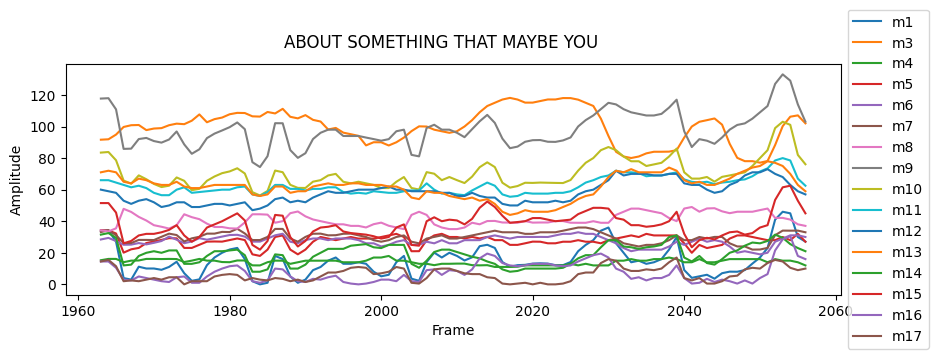

In [13]:
es.plot(SENTENCE_DT, FILTER_ID.loc[id_sentence].text)

## Identifying the word sequence in the sentence time series

In [14]:
# O frame de início e fim foi encontrado a partir de análise visual e auditiva do vídeo
frame_begin = 2026
frame_end = 2026+14

WORD_DT = SENTENCE_DT.query(f'frame_raw >= {frame_begin} & frame_raw <= {frame_end}')

findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times Ne

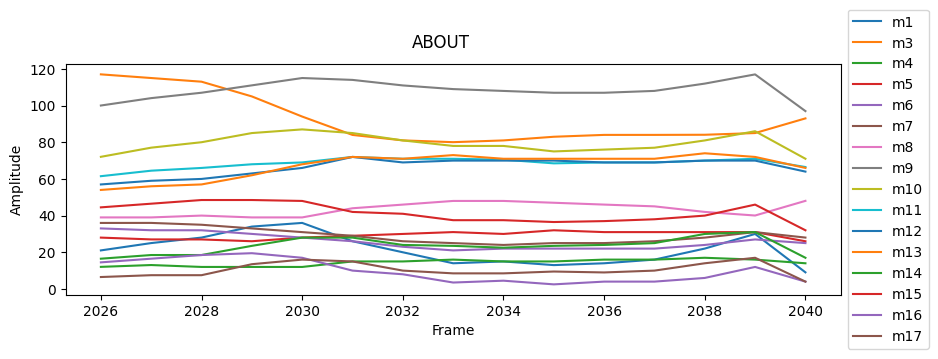

In [15]:
es.plot(WORD_DT, word)

## Analysis of variability in measurements of the selected word.

In [16]:
VD_MEASURE_DT_SUMARY =  WORD_DT.describe().T
VD_MEASURE_DT_SUMARY = VD_MEASURE_DT_SUMARY[['mean', 'std', 'min', 'max']]

# coefficient of variation
VD_MEASURE_DT_SUMARY['CV (%)'] = (VD_MEASURE_DT_SUMARY['std']/VD_MEASURE_DT_SUMARY['mean']) * 100
VD_MEASURE_DT_SUMARY.sort_values(by='CV (%)', ascending=False)

,mean,std,min,max,CV (%)
m16,9.633333,6.168661,2.500000,19.500000,64.034545
m1,21.545837,8.148855,9.055385,36.013886,37.821019
m17,10.433333,3.797869,4.000000,17.000000,36.401301
m14,23.566667,4.503438,16.500000,31.000000,19.109354
m6,25.939363,4.185361,21.023796,33.015148,16.135171
m3,92.228291,13.472549,80.056230,117.038455,14.607827
m7,29.208297,4.226878,24.000000,36.013886,14.471498
m15,41.566667,5.188816,32.000000,48.500000,12.483117
m4,14.405333,1.758563,12.000000,17.000000,12.207719
m13,67.266667,6.713171,54.000000,74.000000,9.979937


findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.


findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times Ne

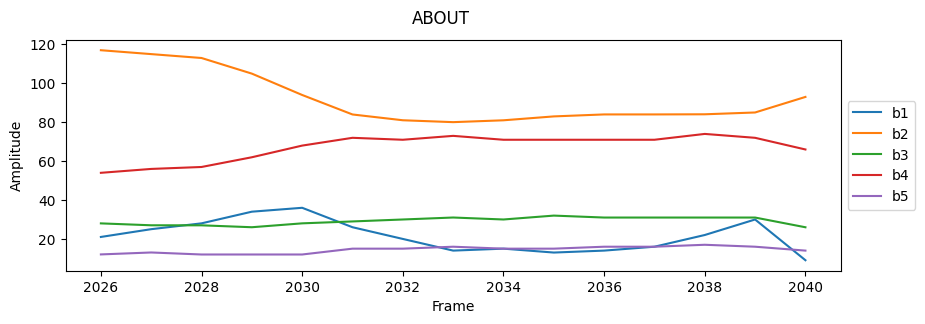

In [17]:
# select best measures to search

new_measures = {'m1': 'b1', 
             'm3': 'b2',
             'm5': 'b3',
             'm13': 'b4',
             'm4': 'b5'}

reference_measures = ['b1', 'b2', 'b3', 'b4', 'b5']
PLOT_DT = WORD_DT.rename(columns=new_measures)
PLOT_DT = PLOT_DT[reference_measures]
es.plot(PLOT_DT, word, f'{word}_word', save_fig=True)

reference_measures = ['m4', 'm5', 'm13']

## Searching word in the sentence

In [18]:
# Set the seed
Q_df = WORD_DT[reference_measures]

# Set the time-serie
T_df = SENTENCE_DT[reference_measures]

## Busca os padrões na série

In [19]:
c_list = []
for step in range(0,len(Q_df.columns)):
    comp_object = es.Comparing(Q_df[reference_measures[step]], T_df[reference_measures[step]])
    comp_object.calc_matches()
    comp_object.measure_name = reference_measures[step]
    c_list.append(comp_object)

print('Results:')
for c in c_list:
    print(c.measure_name, '-', len(c.matches_idxs), c.matches_idxs)

/home/orlando/.local/lib/python3.10/site-packages/numba/np/ufunc/parallel.py:371: NumbaWarning:

The TBB threading layer requires TBB version 2021 update 6 or later i.e., TBB_INTERFACE_VERSION >= 12060. Found TBB_INTERFACE_VERSION = 12050. The TBB threading layer is disabled.



Results:
m4 - 1 [[2.9988008435812754e-07 63]]
m5 - 1 [[0.0 63]]
m13 - 1 [[0.0 63]]


## Tratamento do resultado

In [22]:
# Salva os resultados encontrado em all_index
all_index = []
for c in c_list:  
    all_index.append(c.matches_idxs[:, 1])

# Filtra por coincidência a partir de um um treshold de distancia entre a posição dos indexs
threshold = 10
aux = all_index.copy()
filter_index = es.find_all_matches(aux, threshold)

# Converte os frames encontrados de acordo com o frame_seq original da sentença
filter_index_list=list(filter_index[0])
filter_index_begin = []
for idx in filter_index_list:
    filter_index_begin.append(idx)
idxs_match_frame_seq = list(T_df.iloc[filter_index_begin].index)

print('total de ocorrências:', len(idxs_match_frame_seq))
print('frames de início:', idxs_match_frame_seq)

total de ocorrências: 1
frames de início: [2026]


## Busca em todo o vídeo

In [23]:
# READ VD MEASURES
# Generate the path of the video in dataset
VD_MEASURE_FILE_NAME = 'VD_MEASURE_L0.CSV'
path_video = os.path.join(baseDir_yt, f'VD_Y_{video_id:010d}', VD_MEASURE_FILE_NAME)
VD_MEASURE_DT = pd.read_csv(path_video)
VD_MEASURE_DT.drop(columns=["Unnamed: 0"], inplace=True)

In [24]:
# Set the seed
Q_df = WORD_DT[reference_measures]

# Set the time-serie
T_df = VD_MEASURE_DT[reference_measures]

In [25]:
# Busca os padrões na série
c_list = []
for step in range(0,len(Q_df.columns)):
    comp_object = es.Comparing(Q_df[reference_measures[step]], T_df[reference_measures[step]])
    comp_object.calc_matches()
    comp_object.measure_name = reference_measures[step]
    c_list.append(comp_object)

print('Results:')
for c in c_list:
    print(c.measure_name, '-', len(c.matches_idxs))

Results:
m4 - 47
m5 - 53
m13 - 40


## Tratamento do resultado

In [27]:
# Salva os resultados encontrado em all_index
all_index = []
for c in c_list:  
    all_index.append(c.matches_idxs[:, 1])

# Filtra por coincidência a partir de um um treshold de distancia entre a posição dos indexs
threshold = 1
aux = all_index.copy()
filter_index = es.find_all_matches(aux, threshold)

# Converte os frames encontrados de acordo com o frame_seq original da sentença
filter_index_list=list(filter_index[0])
filter_index_begin = []
for idx in filter_index_list:
    filter_index_begin.append(idx)
idxs_match_frame_seq = list(VD_MEASURE_DT.loc[filter_index_begin, 'frame_seq'].values)

print('total de ocorrências:', len(idxs_match_frame_seq))
print('frames de início convertidos (frame_seq):', idxs_match_frame_seq)

total de ocorrências: 2
frames de início convertidos (frame_seq): [2087, 3572]


In [28]:
# Abrir um arquivo para escrita ('w')
with open(f'{word}_RESULTADOS.txt', 'w') as arquivo:
    # Escrever no arquivo
    arquivo.write('palavra: '+ word+ '\n')
    arquivo.write('video_id: '+ str(video_id)+ '\n')
    arquivo.write('frame_begin: ' + str(frame_begin)+ '\n')
    arquivo.write('frame_end: ' + str(frame_end)+ '\n')
    arquivo.write('total de ocorrências: ' + str(len(idxs_match_frame_seq))+ '\n')
    arquivo.write('frames de início: ' + str(idxs_match_frame_seq))